In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel("C:/Users/Saima Modak/Capstone Projects/Tourism Analysis/Datasets/Final Dataset.xlsx")

In [4]:
# User distribution across geography
print("\n=== Geographic Distribution ===")
print(df['Continent'].value_counts())
print(f"\nBy Percentage: \n{df['Continent'].value_counts(normalize=True) * 100}")


=== Geographic Distribution ===
Continent
Asia                   15693
Australia & Oceania    14852
Europe                 13278
America                 8187
Africa                   920
Name: count, dtype: int64

By Percentage: 
Continent
Asia                   29.648592
Australia & Oceania    28.059701
Europe                 25.085963
America                15.467599
Africa                  1.738145
Name: proportion, dtype: float64


In [5]:
print("\nTop 10 Countries:")
print(df['Country'].value_counts().head(10))


Top 10 Countries:
Country
Australia         13322
United Kingdom     6722
United States      6261
Indonesia          4842
Singapore          2807
India              2543
Malaysia           1581
Canada             1486
New Zealand        1479
Netherlands         859
Name: count, dtype: int64


In [6]:
print("\nTop 10 Regions:")
print(df['Region'].value_counts().head(10))


Top 10 Regions:
Region
Australia           13322
South East Asia     10392
Western Europe       8534
Northern America     7847
South Asia           2874
Central Europe       2309
Oceania              1530
Middle East          1266
East Asia            1121
Southern Europe       990
Name: count, dtype: int64


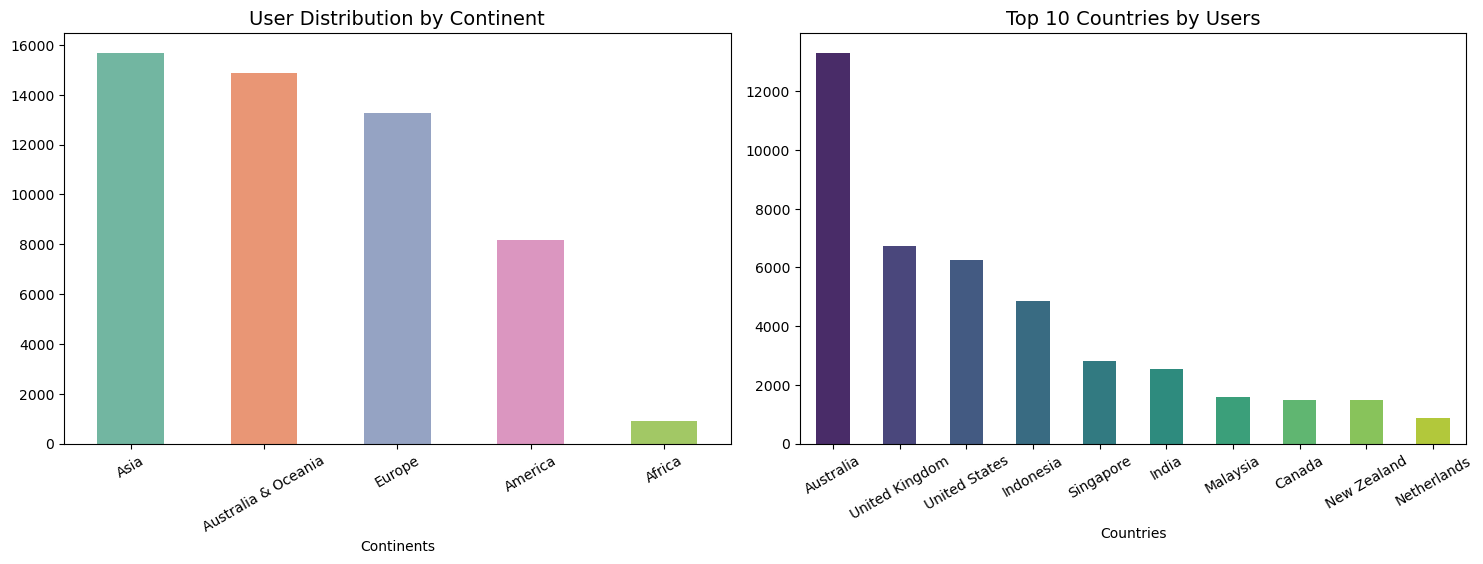

In [7]:
# Visualize geographic distribution

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
continent_counts = df['Continent'].value_counts()
sns.barplot(x=continent_counts.index, y=continent_counts.values, palette='Set2', width=0.5)
plt.title('User Distribution by Continent', fontsize = 14)
plt.xlabel("Continents")
plt.xticks(rotation=30)

plt.subplot(2, 2, 2)
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis', width=0.5)
plt.title('Top 10 Countries by Users', fontsize = 14)
plt.xlabel("Countries")
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

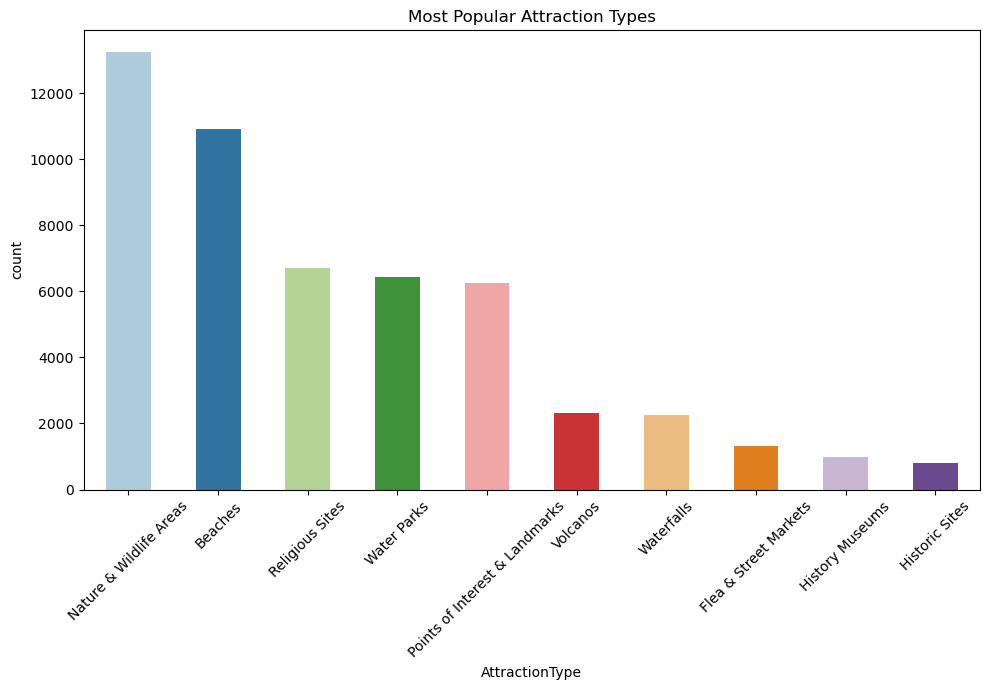

In [8]:
# Visualize Attraction type analysis

plt.figure(figsize=(10, 7))

attraction_popularity = df.groupby('AttractionType').agg({
    'Rating': ['count', 'mean']
}).reset_index()
attraction_popularity.columns = ['AttractionType', 'count', 'avg_rating']
attraction_popularity = attraction_popularity.sort_values('count', ascending=False).head(10)
sns.barplot(data=attraction_popularity, x='AttractionType', y='count', palette='Paired', width=0.5)
plt.title('Most Popular Attraction Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

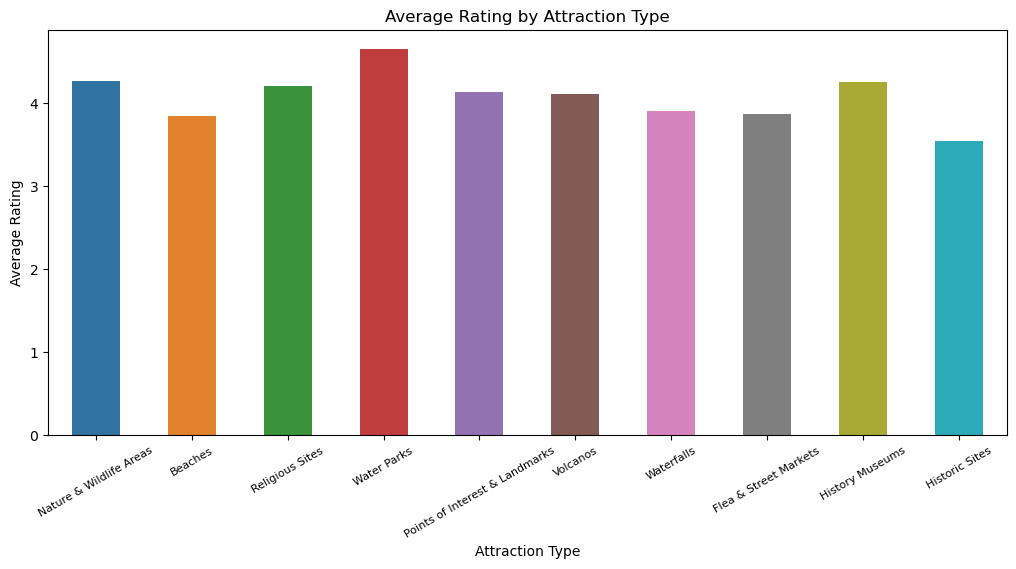

In [9]:
# Visualize Average Rating by Attraction Type
plt.figure(figsize = (20,10))
plt.subplot(2, 2, 2)
sns.barplot(data=attraction_popularity, x='AttractionType', y='avg_rating', palette='tab10', width=0.5)
plt.title('Average Rating by Attraction Type')
plt.xlabel("Attraction Type")
plt.ylabel("Average Rating")
plt.xticks(rotation = 30, fontsize = 8)
plt.tight_layout()
plt.show()

In [10]:
# Visit Mode and Demographics correlation
print("\n=== Visit Mode Demographics Analysis ===")

# Cross-tabulation of visit mode with continent
visit_mode_continent = pd.crosstab(df['Continent'], df['VisitMode'], normalize='index') * 100
print("\nVisit Mode by Continent (%):")
print(visit_mode_continent)


=== Visit Mode Demographics Analysis ===

Visit Mode by Continent (%):
VisitMode            Business    Couples     Family    Friends       Solo
Continent                                                                
Africa               0.434783  49.021739  21.956522  21.413043   7.173913
America              1.233663  43.483572  19.054599  23.390741  12.837425
Asia                 2.351367  33.314217  31.160390  23.672975   9.501051
Australia & Oceania  0.370320  37.395637  39.274172  17.532992   5.426879
Europe               0.707938  51.415876  20.575388  18.933574   8.367224


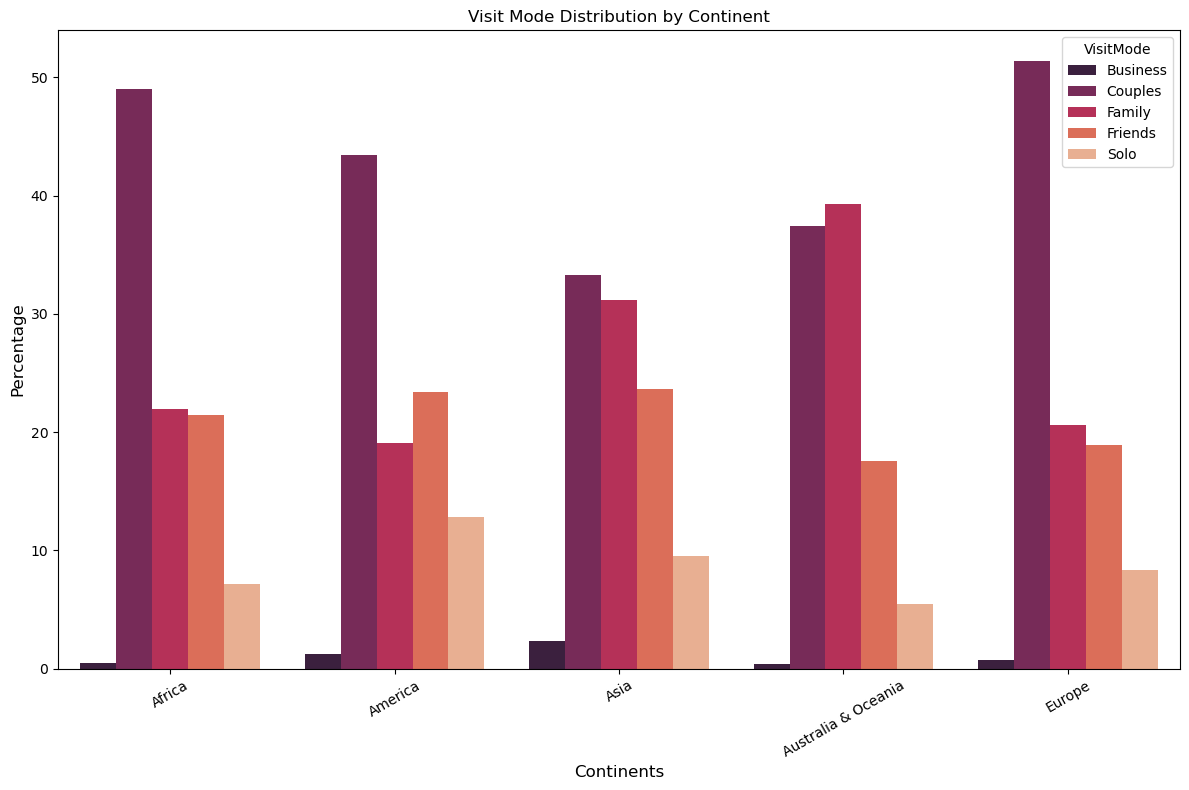

In [11]:
# Visualize Visit Mode Distribution
plt.figure(figsize=(12, 8))
visit_mode_continent_melt = visit_mode_continent.reset_index().melt(id_vars='Continent')
sns.barplot(data=visit_mode_continent_melt, x='Continent', y='value', hue='VisitMode', palette= 'rocket')
plt.title('Visit Mode Distribution by Continent')
plt.xlabel('Continents', fontsize = 12)
plt.ylabel('Percentage', fontsize = 12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

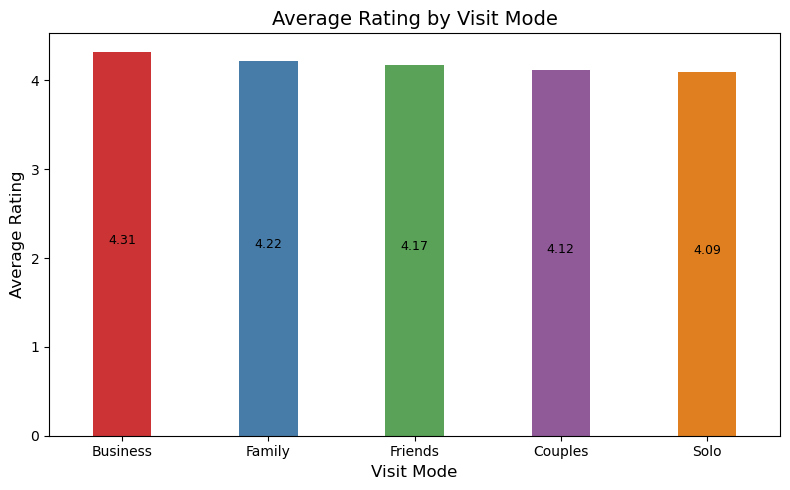

In [12]:
# Visualize Rating analysis
plt.figure(figsize= (8,5))
rating_by_mode = df.groupby('VisitMode')['Rating'].mean().sort_values(ascending=False)
bars = sns.barplot(x = rating_by_mode.index, y = rating_by_mode.values, palette = "Set1", width = 0.4)
plt.title('Average Rating by Visit Mode', fontsize = 14)
plt.xlabel("Visit Mode", fontsize = 12)
plt.ylabel('Average Rating', fontsize = 12)
for i, v in enumerate(rating_by_mode.values):
    bars.text(i, v/2, f'{v:.2f}', ha='center', fontsize = 9)
plt.tight_layout()
plt.show()

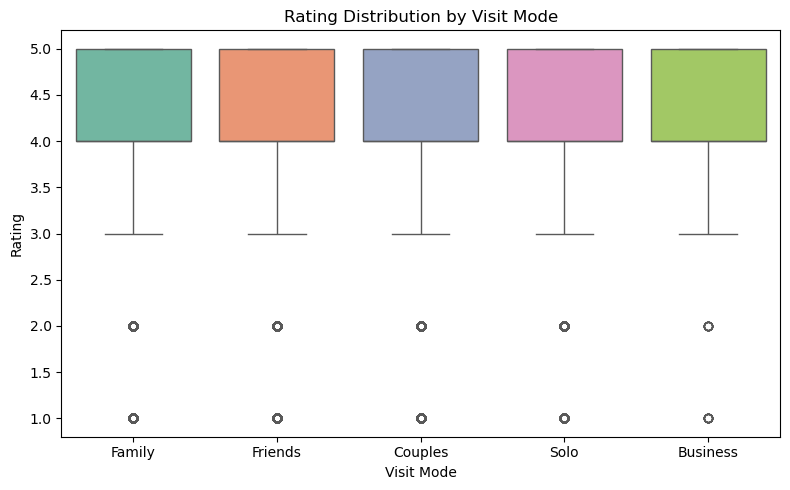

             count      mean       std  min  25%  50%  75%  max
VisitMode                                                      
Business     623.0  4.313002  0.850539  1.0  4.0  4.0  5.0  5.0
Couples    21620.0  4.116559  0.999937  1.0  4.0  4.0  5.0  5.0
Family     15217.0  4.218703  0.942698  1.0  4.0  4.0  5.0  5.0
Friends    10945.0  4.174052  0.940453  1.0  4.0  4.0  5.0  5.0
Solo        4525.0  4.088177  0.992436  1.0  4.0  4.0  5.0  5.0


In [13]:
 # Visualize Rating by VisitMode to identify Outliers
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='VisitMode', y='Rating', palette='Set2')
plt.title('Rating Distribution by Visit Mode')
plt.xlabel('Visit Mode')
plt.tight_layout()
plt.show()

print(df.groupby('VisitMode')['Rating'].describe())

In [14]:
# Regional rating analysis
print("\n=== Regional Rating Analysis ===")

regional_ratings = df.groupby('Region')['Rating'].agg(['count', 'mean', 'std']).sort_values('mean', ascending=False)
print("\nTop 10 Regions by Average Rating:")
print(regional_ratings.head(10))


=== Regional Rating Analysis ===

Top 10 Regions by Average Rating:
                  count      mean       std
Region                                     
Central Asia         16  4.500000  0.894427
North Africa        182  4.285714  0.960958
Middle East        1266  4.242496  0.956176
Australia         13322  4.219712  0.964963
South Asia         2874  4.218859  0.867749
Caribbean            54  4.203704  0.959159
Northern America   7847  4.167580  0.978785
Oceania            1530  4.149020  1.008150
South East Asia   10392  4.134527  0.931177
Central America      46  4.130435  1.002413


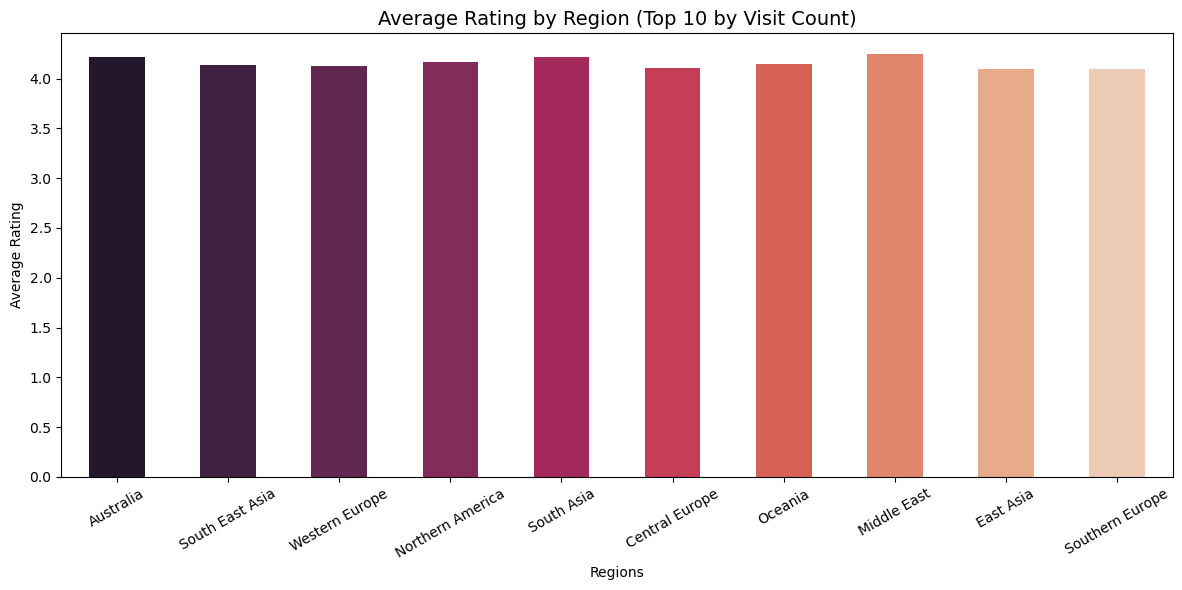

In [15]:
# Visualize regional patterns
plt.figure(figsize=(12, 6))
top_regions = regional_ratings.sort_values('count', ascending=False).head(10)
sns.barplot(x = top_regions.index, y = top_regions['mean'], width = 0.5, palette = 'rocket')
plt.title('Average Rating by Region (Top 10 by Visit Count)', fontsize = 14)
plt.xticks(rotation=30)
plt.xlabel('Regions')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

In [16]:
# Seasonal analysis
print("\n=== Seasonal Analysis ===")
print("\nVisits by Season:")
print(df['VisitSeason'].value_counts())

seasonal_stats = df.groupby('VisitSeason').agg({
    'Rating': ['count', 'mean'],
    'AttractionType': lambda x: x.mode()[0],
    'VisitMode': lambda x: x.mode()[0]
}).reset_index()
seasonal_stats.columns = ['Season', 'visit_count', 'avg_rating', 'popular_attraction', 'common_mode']
print("\nSeasonal Summary:")
print(seasonal_stats)


=== Seasonal Analysis ===

Visits by Season:
VisitSeason
Summer    14248
Fall      13478
Winter    12671
Spring    12533
Name: count, dtype: int64

Seasonal Summary:
   Season  visit_count  avg_rating       popular_attraction common_mode
0    Fall        13478    4.222659  Nature & Wildlife Areas     Couples
1  Spring        12533    4.139552  Nature & Wildlife Areas     Couples
2  Summer        14248    4.166409  Nature & Wildlife Areas     Couples
3  Winter        12671    4.096756  Nature & Wildlife Areas     Couples


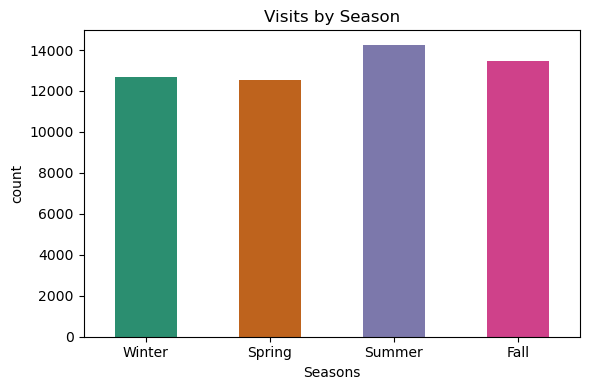

In [17]:
# Visualize Visits by Season

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='VisitSeason', order=['Winter', 'Spring', 'Summer', 'Fall'], width = 0.5, palette = 'Dark2')
plt.title('Visits by Season')
plt.xlabel('Seasons')
plt.tight_layout()
plt.show()

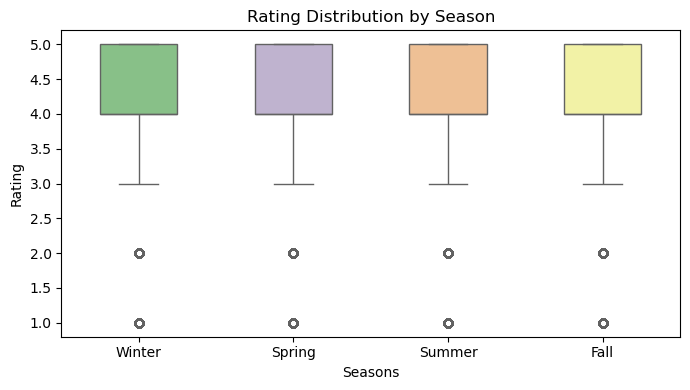

In [18]:
# Visualize Rating Distribution by Season
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='VisitSeason', y='Rating', order=['Winter', 'Spring', 'Summer', 'Fall'], width = 0.5, palette = 'Accent')
plt.title('Rating Distribution by Season')
plt.xlabel('Seasons')
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

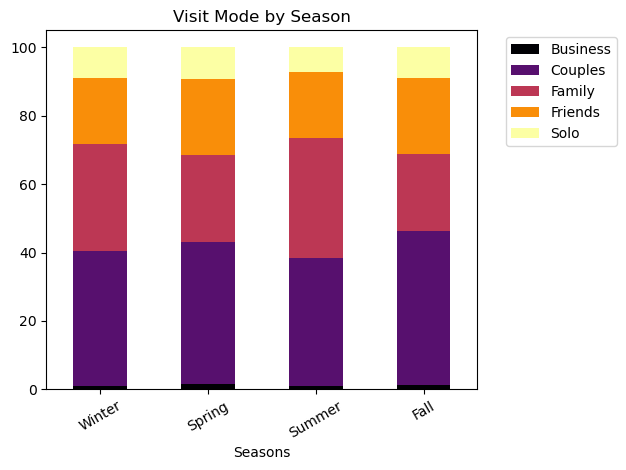

In [19]:
# Visualize Visit Mode by Season
plt.figure(figsize=(10,8))
season_mode = pd.crosstab(df['VisitSeason'], df['VisitMode'], normalize='index') * 100
season_mode.loc[['Winter', 'Spring', 'Summer', 'Fall']].plot(kind='bar', stacked=True, cmap = 'inferno')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Visit Mode by Season')
plt.xlabel('Seasons')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [20]:
# Correlation analysis
print("\n=== Correlation Analysis ===")
correlation_features = ['Rating', 'user_avg_rating', 'attraction_avg_rating', 'user_visits', 'attraction_visits', 'VisitMonth']
correlation_matrix = df[correlation_features].corr()
print(correlation_matrix)


=== Correlation Analysis ===


KeyError: "['user_avg_rating', 'attraction_avg_rating', 'user_visits', 'attraction_visits'] not in index"

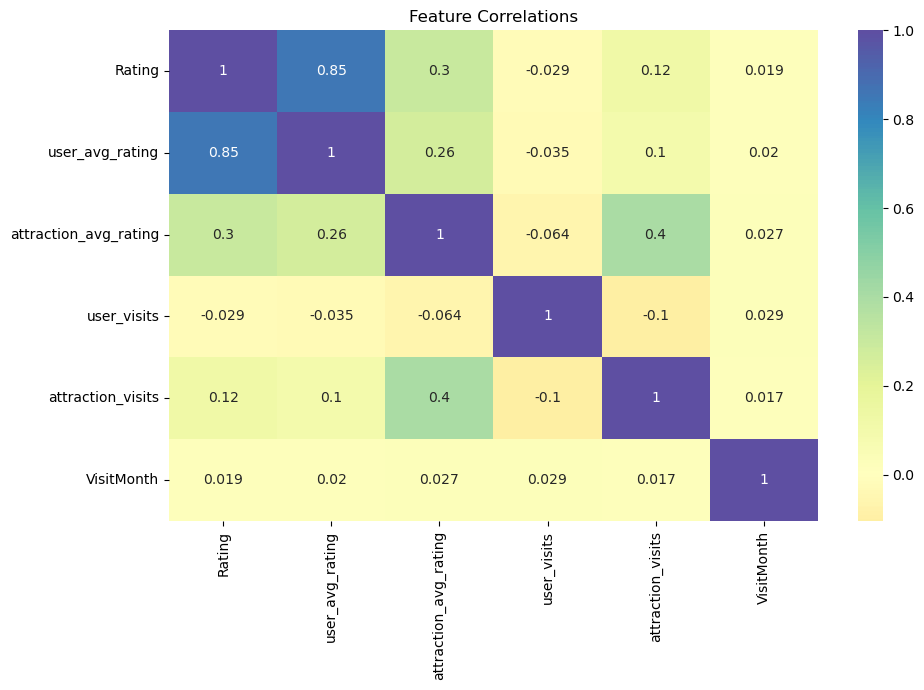

In [ ]:
# Visualize correlations
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', center=0)
plt.title('Feature Correlations')
plt.tight_layout()
plt.show()

In [ ]:
# Summary statistics
print("\n=== Summary Statistics ===")
print("\nRating Distribution:")
print(df['Rating'].describe())

print("\nVisit Mode Distribution:")
print(df['VisitMode'].value_counts(normalize=True) * 100)

print("\nUser Behavior Summary:")
user_behavior = df.groupby('UserId').agg({
    'Rating': ['count', 'mean', 'std'],
    'VisitMode': lambda x: x.nunique()
}).reset_index()
user_behavior.columns = ['UserId', 'total_visits', 'avg_rating', 'rating_std', 'unique_modes']
print(user_behavior.describe())


=== Summary Statistics ===

Rating Distribution:
count    52930.000000
mean         4.157699
std          0.970543
min          1.000000
25%          4.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

Visit Mode Distribution:
VisitMode
Couples     40.846401
Family      28.749292
Friends     20.678254
Solo         8.549027
Business     1.177026
Name: proportion, dtype: float64

User Behavior Summary:
             UserId  total_visits    avg_rating    rating_std  unique_modes
count  33530.000000  33530.000000  33530.000000  10618.000000  33530.000000
mean   45112.842231      1.578586      4.167413      0.559919      1.110409
std    24904.878706      1.316680      0.915425      0.591037      0.373895
min       14.000000      1.000000      1.000000      0.000000      1.000000
25%    23825.250000      1.000000      4.000000      0.000000      1.000000
50%    45556.500000      1.000000      4.000000      0.577350      1.000000
75%    666